In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from skimage.io import imread
from skimage.transform import resize

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
input_path = "/Users/jay55/Desktop/deeplearning/data set"
categories = ['normal' , 'rotten']
data = []
labels = []
for category_idx , category in enumerate(categories):
  for file in os.listdir(os.path.join(input_path , category)):
    img_path = os.path.join(input_path , category , file)
    print(img_path)
    img = imread(img_path)
    img = resize(img , (32,32))
    data.append(img.flatten())
    labels.append(category_idx)


/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (1).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (10).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (100).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (101).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (102).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (103).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (104).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (105).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (106).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (107).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (108).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (109).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (11).jpg
/Users/jay55/Desktop/deeplearning/data set\normal\FreshApple (110).jpg
/Users/jay

In [ ]:
data[1]

array([0.5941676 , 0.57241726, 0.57682836, ..., 0.81967848, 0.8029464 ,
       0.79169516])

In [ ]:
labels[1]

0

###matrix to numpy array

In [ ]:
data = np.asanyarray(data)
labels = np.asanyarray(labels)

In [ ]:
data

array([[0.84035063, 0.92707742, 0.99861716, ..., 0.669626  , 0.79948554,
        0.97497206],
       [0.5941676 , 0.57241726, 0.57682836, ..., 0.81967848, 0.8029464 ,
        0.79169516],
       [0.66403719, 0.63058359, 0.62911208, ..., 0.84804873, 0.8259151 ,
        0.81433439],
       ...,
       [0.77637317, 0.77972565, 0.7880171 , ..., 0.77328761, 0.76184006,
        0.76279089],
       [0.77778513, 0.76906358, 0.77785342, ..., 0.81448733, 0.80343284,
        0.80190632],
       [0.82337812, 0.82405638, 0.83150063, ..., 0.88318327, 0.87104123,
        0.8677039 ]])

In [ ]:
labels

array([0, 0, 0, ..., 1, 1, 1])

###split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(data , labels , test_size = 0.2 , shuffle = True , stratify = labels)

###model

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()

In [ ]:
svm_model.fit(x_train , y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(x_test)

###evaluation

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test , y_pred)
score

0.925

In [ ]:
y_pred = svm_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[155   5]
 [ 19 141]]


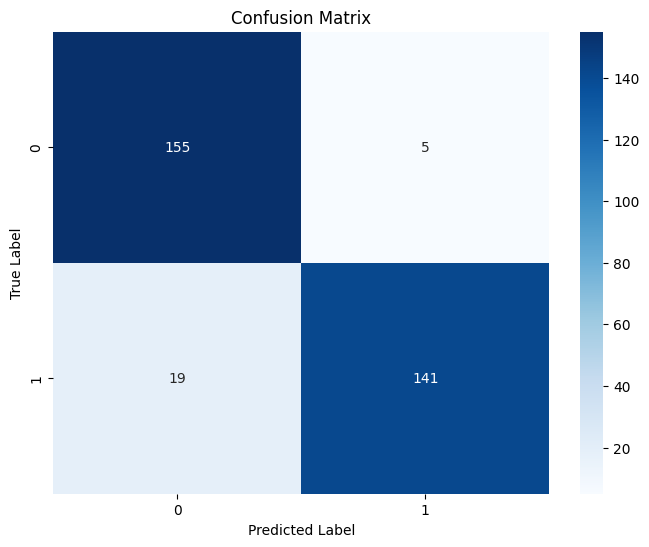

In [ ]:
import seaborn as sns

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matrix")
plt.show()

c:\Users\jay55\Desktop\deeplearning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jay55\Desktop\deeplearning\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jay55\Desktop\deeplearning\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jay55\Desktop\deeplearning\.venv\Lib\site-packages\s

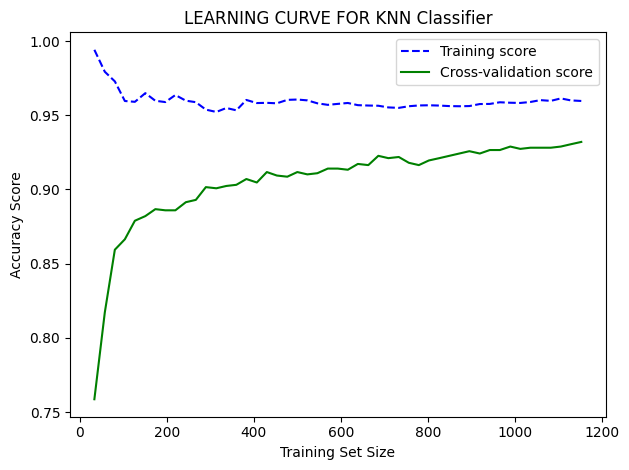

In [ ]:
from sklearn.model_selection import learning_curve
sizes, training_scores, testing_scores = learning_curve(SVC(), x_train, y_train, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
# normalisation
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# random forest classifier - baseline
rfc = RandomForestClassifier()

# fit
rfc.fit(x_train,y_train)

# predict
y_pred = rfc.predict(x_test)

# accuracy score
acc = '{:.1%}'.format(accuracy_score(y_test, y_pred))
print(f"Accuracy for Random Forrest: {acc}")

Accuracy for Random Forrest: 93.1%


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[149  11]
 [ 13 147]]


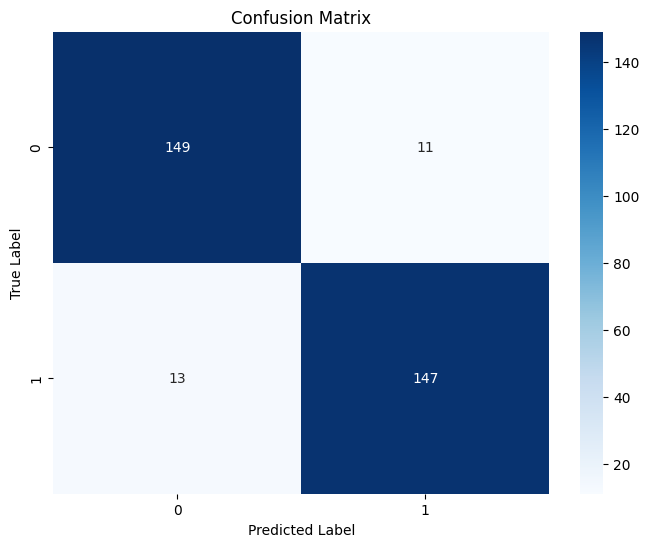

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title("Confusion Matrix")
plt.show()